Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [10]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [11]:
# Directory with our training horse pictures
train_h_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_s_dir = os.path.join('/tmp/h-or-s/sad')

train_h_names = os.listdir(train_h_dir)
print(train_h_names[:10])

train_s_names = os.listdir(train_s_dir)
print(train_s_names[:10])

['happy1-12.png', 'happy1-15.png', 'happy2-11.png', 'happy2-16.png', 'happy2-18.png', 'happy2-09.png', 'happy2-07.png', 'happy2-00.png', 'happy1-04.png', 'happy1-03.png']
['sad2-02.png', 'sad2-05.png', 'sad1-08.png', 'sad1-01.png', 'sad1-06.png', 'sad1-17.png', 'sad1-10.png', 'sad1-19.png', 'sad2-14.png', 'sad2-13.png']


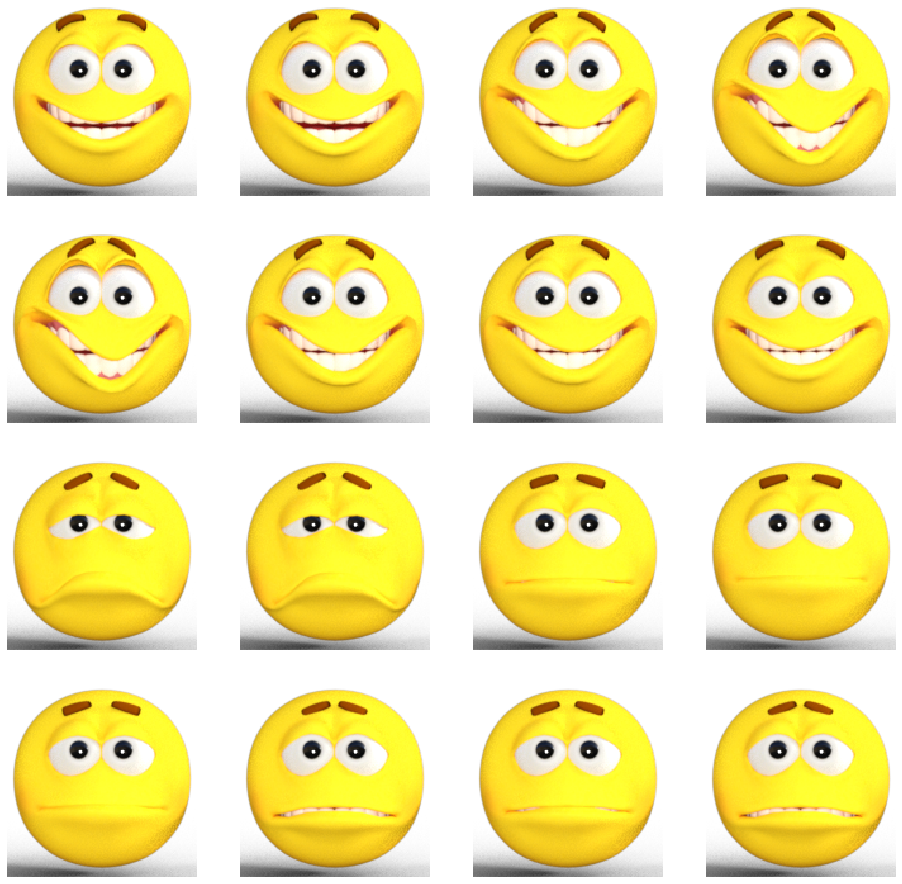

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_h_pix = [os.path.join(train_h_dir, fname) 
                for fname in train_h_names[pic_index-8:pic_index]]

next_s_pix = [os.path.join(train_s_dir, fname) 
                for fname in train_s_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_h_pix+next_s_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc') > DESIRED_ACCURACY):
              print("\nReached 99.9% accuracy so cancelling training!")
              self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
       
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s',
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary'
    )
    # Expected output: 'Found 80 images belonging to 2 classes'

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit_generator(
        # Your Code Here
        train_generator,
        steps_per_epoch=8,
        epochs=15,
        verbose=1,
        callbacks=[callbacks]
    )
    # model fitting
    return history.history['acc'][-1]

In [8]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 2s 188ms/step - loss: 3.1874 - acc: 0.6000
Epoch 2/15
8/8 [==============================] - 0s 39ms/step - loss: 0.5221 - acc: 0.6875
Epoch 3/15
8/8 [==============================] - 0s 48ms/step - loss: 0.3260 - acc: 0.8500
Epoch 4/15
8/8 [==============================] - 0s 39ms/step - loss: 0.1798 - acc: 0.9000
Epoch 5/15
8/8 [==============================] - 0s 48ms/step - loss: 0.0719 - acc: 0.9625
Epoch 6/15
8/8 [==============================] - 0s 40ms/step - loss: 0.0933 - acc: 0.9750
Epoch 7/15
8/8 [==============================] - 0s 39ms/step - loss: 0.0517 - acc: 0.9875
Epoch 8/15
7/8 [=========================>....] - ETA: 0s - loss: 0.0215 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 0s 50ms/step - loss: 0.0188 - acc: 1.0000


1.0

In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [9]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);